PHASE 1 : IMPORTING AND LOADING DATASET 

In [25]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import zipfile
import requests
import io

# Download and extract the ZIP file
url = "https://archive.ics.uci.edu/static/public/603/in+vehicle+coupon+recommendation.zip"
response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    
# Assuming there's only one CSV inside
    file_name = z.namelist()[0]
    with z.open(file_name) as f:
        df = pd.read_csv(f)

#View first five rows
df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [67]:
# Dataset shape
print(f"Total number of rows in the dataset: {df.shape[0]} ")
print(f"Total number of columns in the dataset: {df.shape[1]} ")
df.shape

Total number of rows in the dataset: 12610 
Total number of columns in the dataset: 26 


(12610, 26)

In [5]:
# Display the column names
print(df.columns)


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


In [81]:
# Datatype infomations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12610 non-null  category
 1   passanger             12610 non-null  category
 2   weather               12610 non-null  category
 3   temperature           12610 non-null  int64   
 4   time                  12610 non-null  category
 5   coupon                12610 non-null  category
 6   expiration            12610 non-null  category
 7   gender                12610 non-null  category
 8   age                   12610 non-null  category
 9   maritalStatus         12610 non-null  category
 10  has_children          12610 non-null  int64   
 11  education             12610 non-null  category
 12  occupation            12610 non-null  category
 13  income                12610 non-null  category
 14  car                   108 non-null    category
 15  Ba

In [77]:
#summary statistics of numeric columns in the DataFrame.
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
#check for dublicate values
df.duplicated().sum()

0

In [73]:
#removing dublicate values
df.drop_duplicates(inplace=True)

In [75]:
#verify dublicates are removed
print("Remaining duplicates:", df.duplicated().sum())
print("New shape:", df.shape)

#Reset index after dropping 
df.reset_index(drop=True, inplace=True)

Remaining duplicates: 0
New shape: (12610, 26)


PHASE 2- PREPROCESSING AND CLEANING

In [83]:
# HANDLING MISSING VALUES
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [19]:
# Drop the 'car' column (too many missing values)
df.drop(columns = ['car'], errors='ignore', inplace=True)

# Fill missing values in food/restaurant visit frequency columns with 'never'
fill_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
df[fill_cols] = df[fill_cols].fillna('never')

print("\nShape after dropping missing values:", df.shape)
 
df.head()



Shape after dropping missing values: (12684, 25)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0


In [51]:
# Recheck for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


             COLUMN CATEGORIZATION

In [157]:
#TAGET COLUMN
target_col = 'Y'  # 1 = Accepted the coupon, 0 = Not accepted

#CATEGORICAL COLUMNS
categorical_cols = [
    'destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
    'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
    'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
    'Restaurant20To50', 'direction_same', 'direction_opp'
]

#NUMERICAL COLUMNS
numerical_cols = [
    'temperature', 'has_children',
    'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'
]

# Convert all object-type columns to 'category'
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].astype('category')

print("\nConverted the following columns to 'category':")
print(categorical_cols.tolist())

print("Target Column:", target_col)
print("Categorical Columns:\n", categorical_cols)
print("Numerical Columns:\n", numerical_cols)


Converted the following columns to 'category':
[]
Target Column: Y
Categorical Columns:
 Index([], dtype='object')
Numerical Columns:
 ['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']


In [93]:
# Final summary
print("\n Final dataset info:")
print(df.info())

# Show sample data
df.head()


 Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12610 non-null  category
 1   passanger             12610 non-null  category
 2   weather               12610 non-null  category
 3   temperature           12610 non-null  int64   
 4   time                  12610 non-null  category
 5   coupon                12610 non-null  category
 6   expiration            12610 non-null  category
 7   gender                12610 non-null  category
 8   age                   12610 non-null  category
 9   maritalStatus         12610 non-null  category
 10  has_children          12610 non-null  int64   
 11  education             12610 non-null  category
 12  occupation            12610 non-null  category
 13  income                12610 non-null  category
 14  car                   108 non-nu

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


ENCODING CATEGORICAL VALUES

In [101]:
#One-hot encode all categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Confirm result
print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)
df_encoded.head()

Original shape: (12610, 26)
Encoded shape: (12610, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [153]:
# Feature matrix and target vector
X = df_encoded.drop('Y', axis=1)
y = df_encoded['Y']

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')


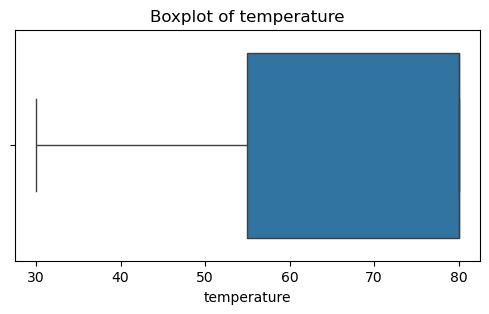

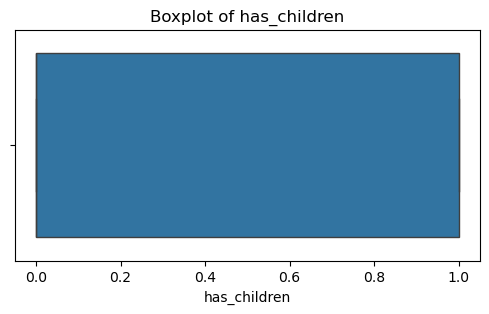

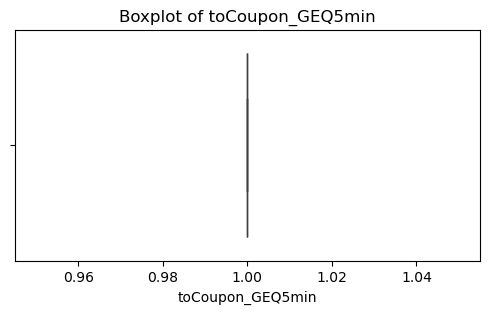

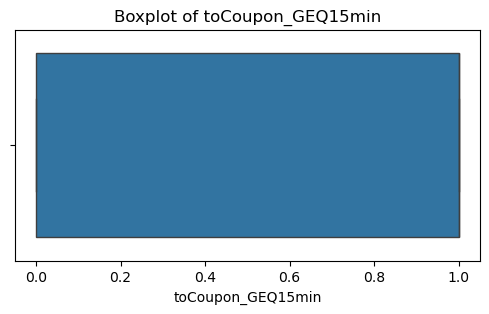

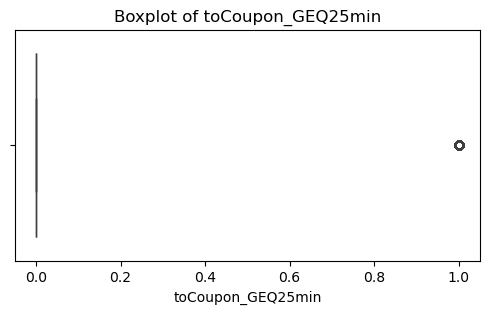

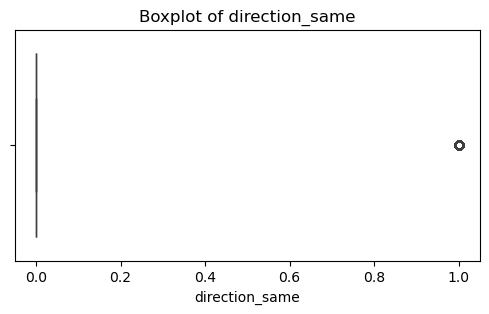

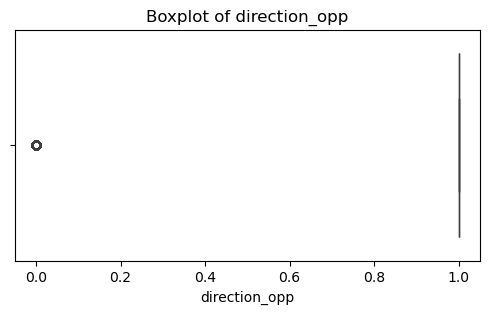

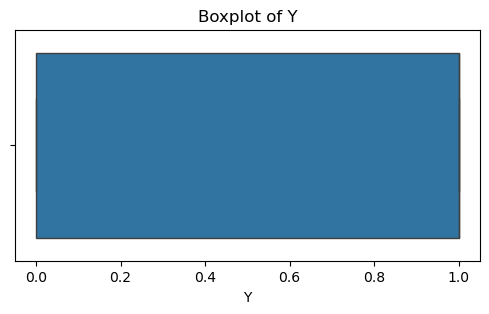

In [118]:
# Outlier Detection and Treatment

# 1 Identify Numeric Columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols) 

# 2  Visualize with Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [116]:
# 3 Detect Outliers Using IQR Method
outlier_indices = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outliers.empty:
        outlier_indices[col] = outliers.index.tolist()

outlier_indices
   


{'toCoupon_GEQ25min': [16,
  17,
  38,
  39,
  60,
  61,
  82,
  83,
  104,
  105,
  126,
  127,
  148,
  149,
  170,
  171,
  189,
  209,
  210,
  231,
  232,
  253,
  254,
  275,
  276,
  295,
  296,
  317,
  318,
  337,
  338,
  359,
  360,
  381,
  382,
  403,
  404,
  425,
  426,
  446,
  447,
  468,
  489,
  490,
  511,
  512,
  539,
  540,
  561,
  562,
  583,
  584,
  605,
  606,
  627,
  628,
  649,
  650,
  671,
  672,
  693,
  694,
  715,
  716,
  737,
  738,
  759,
  760,
  781,
  782,
  803,
  804,
  824,
  825,
  846,
  847,
  874,
  875,
  896,
  897,
  918,
  919,
  940,
  941,
  962,
  963,
  984,
  985,
  1006,
  1007,
  1028,
  1029,
  1050,
  1051,
  1072,
  1073,
  1094,
  1095,
  1116,
  1117,
  1138,
  1139,
  1160,
  1161,
  1188,
  1189,
  1209,
  1210,
  1231,
  1232,
  1253,
  1254,
  1275,
  1276,
  1297,
  1298,
  1319,
  1320,
  1341,
  1342,
  1363,
  1364,
  1385,
  1386,
  1407,
  1408,
  1429,
  1430,
  1451,
  1452,
  1473,
  1474,
  1495,
  1496,
  1

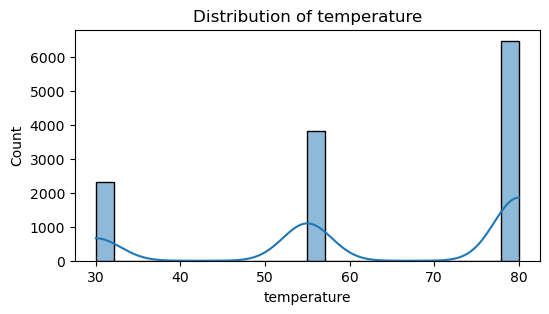

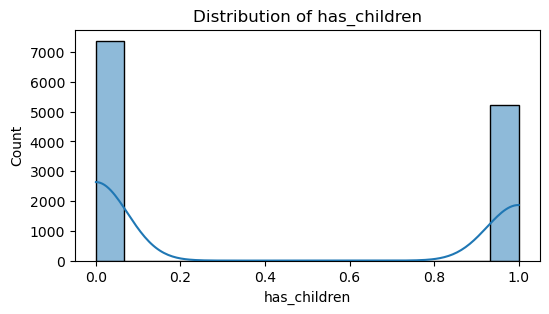

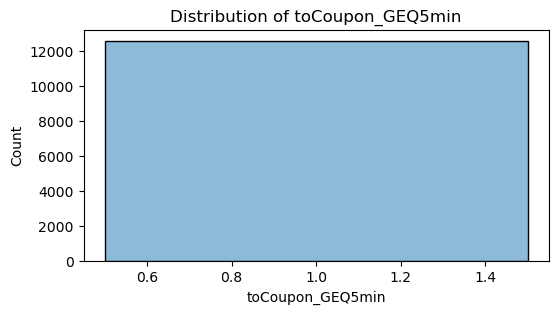

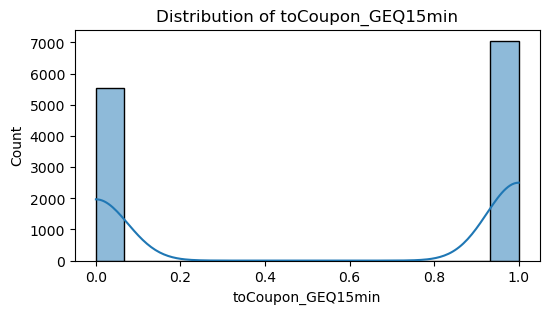

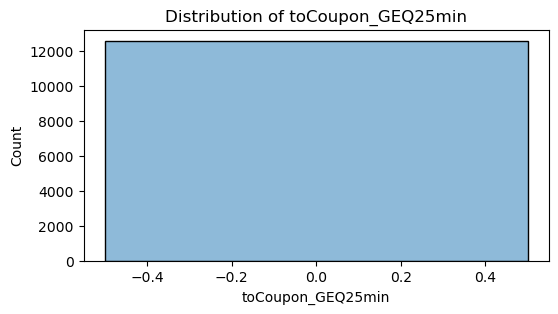

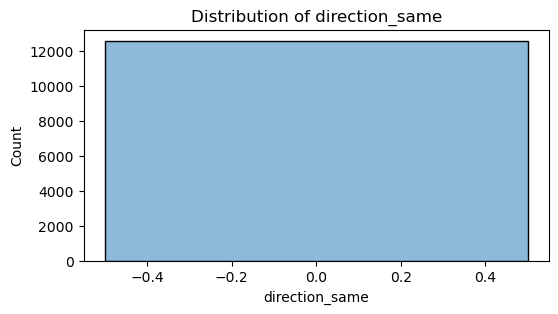

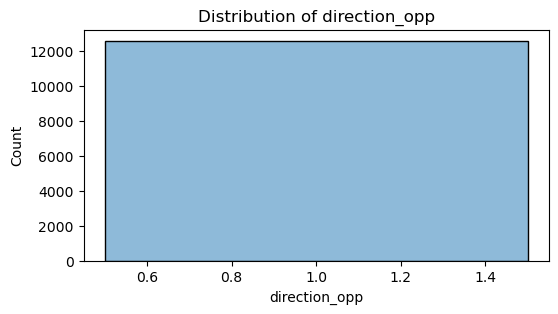

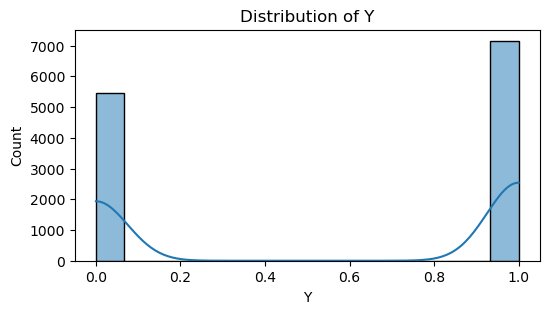

In [128]:
# 4. Histogram with KDE Curve (for distribution & outliers)
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [126]:
#TREATING OUTLIER USING CAPPING ((Winsorization)

for col in outlier_indices:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print(" Outliers capped successfully.")

 Outliers capped successfully.
 Outliers capped successfully.
 Outliers capped successfully.


In [132]:
# Verify Changes
df[numeric_cols].describe()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.0,12610.0,12610.0,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.0,0.0,1.0,0.567565
std,19.153386,0.492657,0.0,0.496432,0.0,0.0,0.0,0.495434
min,30.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.0,0.0,1.0,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.0,0.0,1.0,1.000000
max,80.000000,1.000000,1.0,1.000000,0.0,0.0,1.0,1.000000


Visualizing Outlier Treatment Before v/s After

In [136]:
#1 Create a copy of the original DataFrame before capping
df_before_capping = df.copy()

In [149]:
                     #Apply Cap Outliers
#2 # Apply IQR-based capping to numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper) 

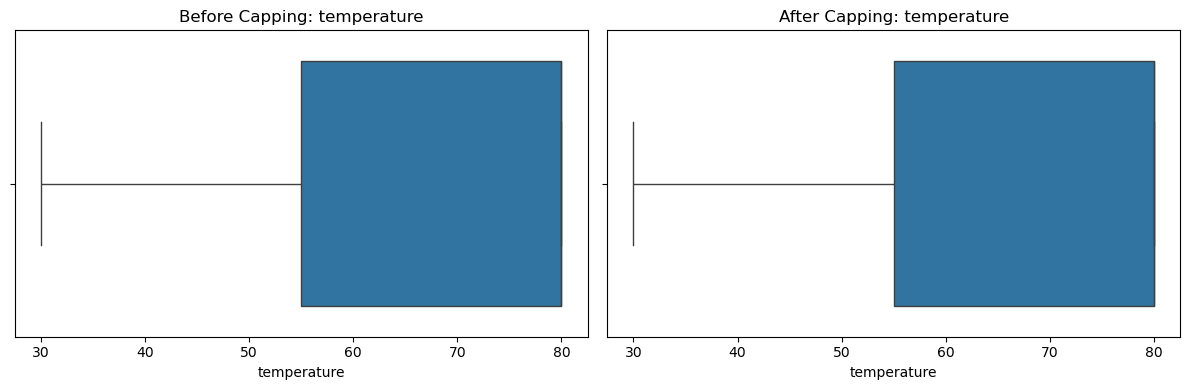

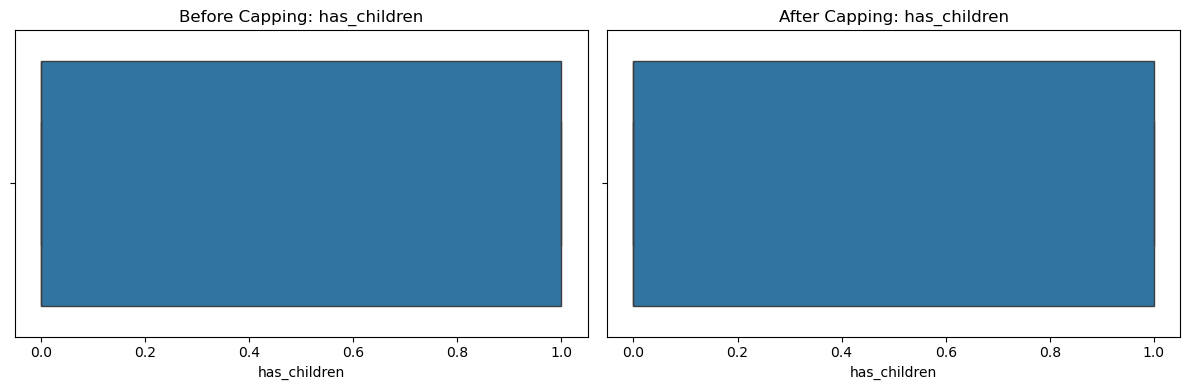

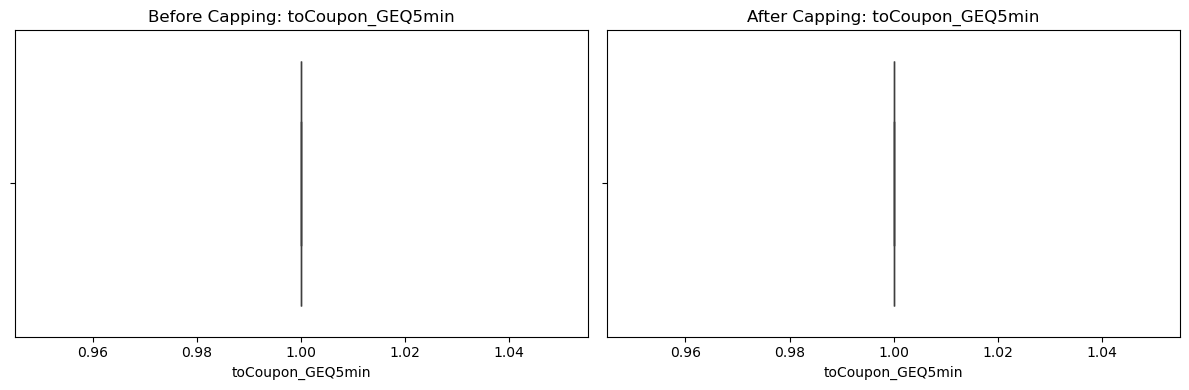

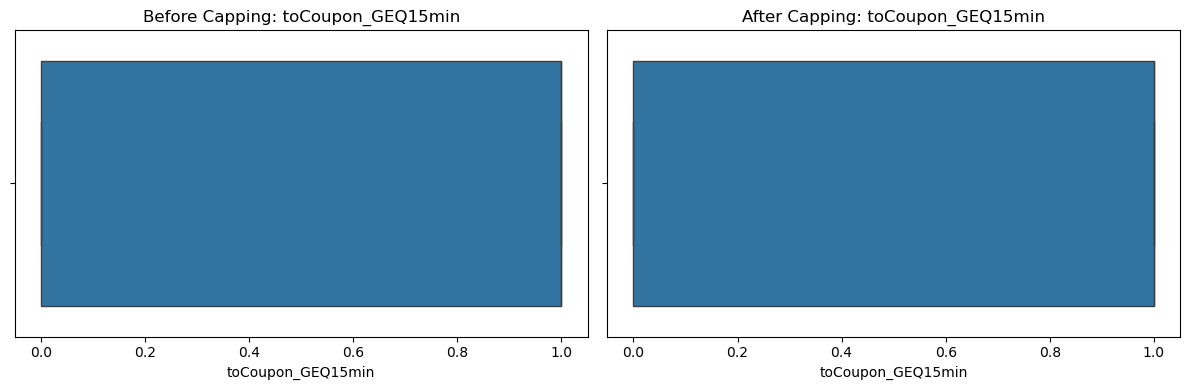

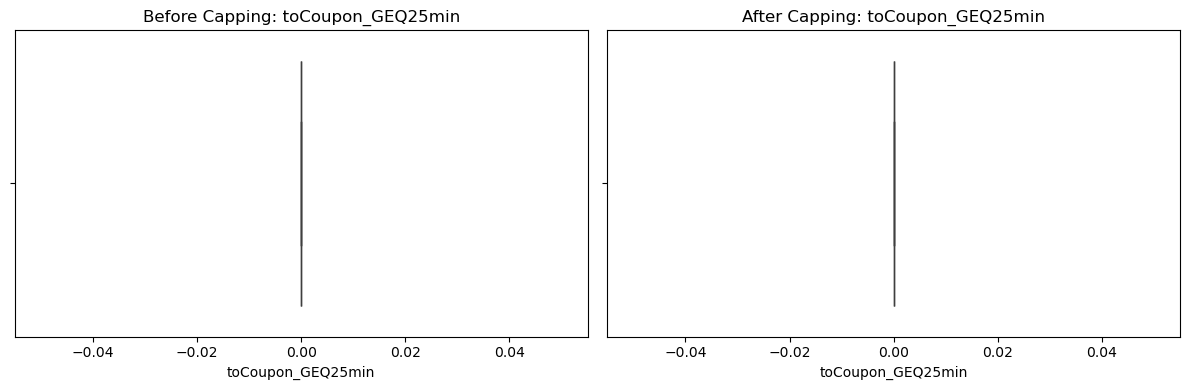

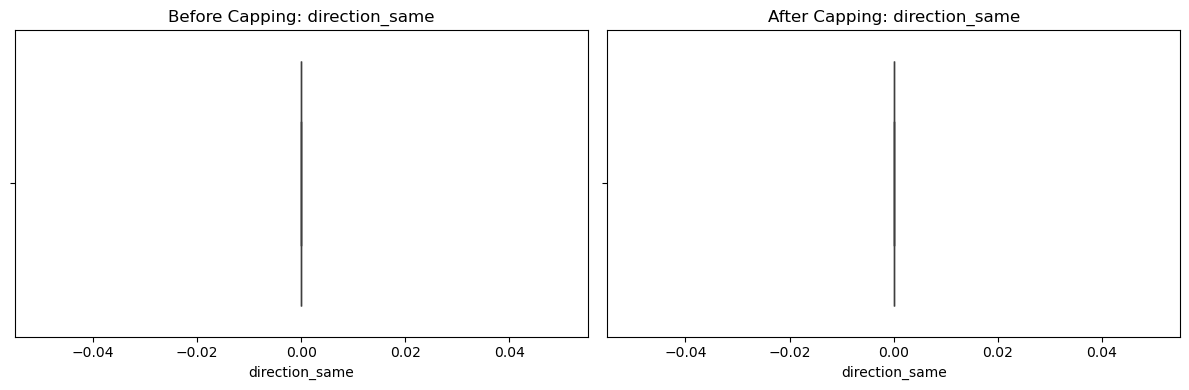

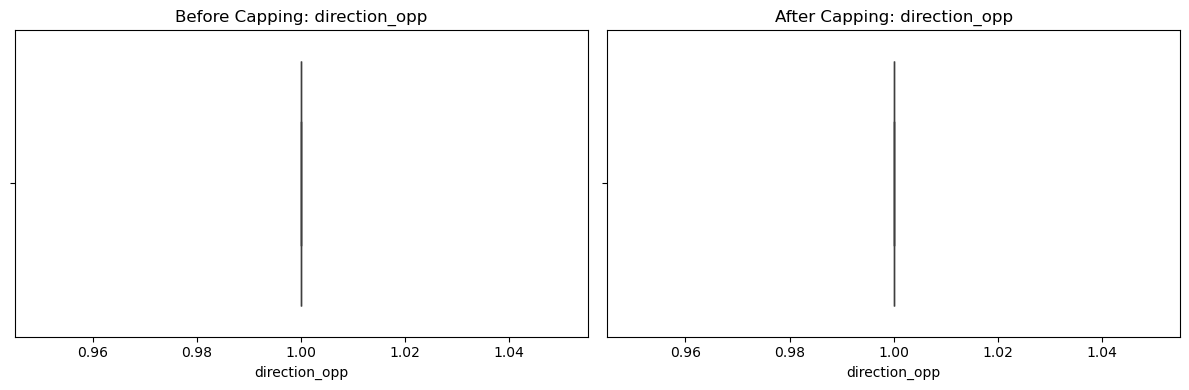

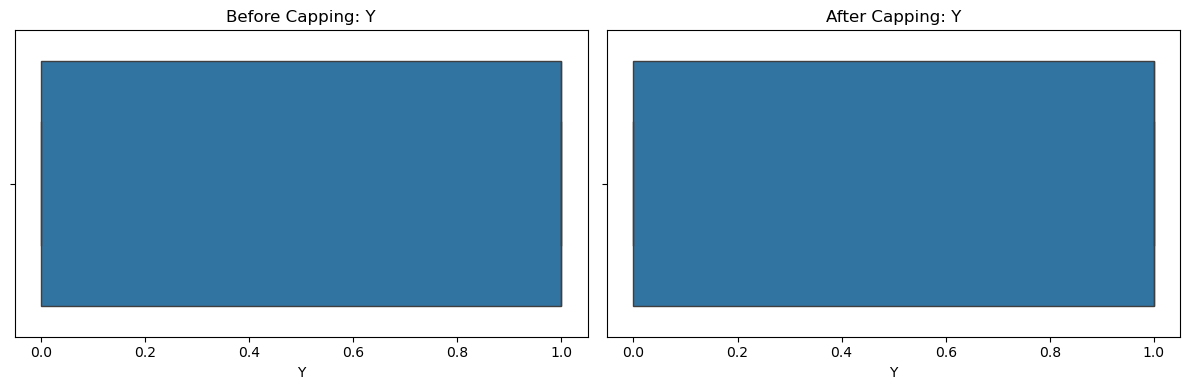

In [143]:
# Visualize Boxplots (Before vs After)
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Before Capping
    sns.boxplot(x=df_before_capping[col], ax=axes[0])
    axes[0].set_title(f"Before Capping: {col}")
    
    # After Capping
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"After Capping: {col}")

    plt.tight_layout()
    plt.show()

In [151]:
                                   #FEATURE SCALING
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [147]:
# TO VERIFY

# Check the scaled result
df_scaled[numeric_cols].describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,1.261000e+04,1.261000e+04,12610.0,1.261000e+04,12610.0,12610.0,12610.0,1.261000e+04
mean,-1.803122e-16,-1.712966e-16,0.0,-4.958585e-17,0.0,0.0,0.0,4.057024e-17
std,1.000040e+00,1.000040e+00,0.0,1.000040e+00,0.0,0.0,0.0,1.000040e+00
min,-1.736955e+00,-8.414142e-01,0.0,-1.127680e+00,0.0,0.0,0.0,-1.145639e+00
25%,-4.316509e-01,-8.414142e-01,0.0,-1.127680e+00,0.0,0.0,0.0,-1.145639e+00
50%,8.736531e-01,-8.414142e-01,0.0,8.867762e-01,0.0,0.0,0.0,8.728754e-01
75%,8.736531e-01,1.188475e+00,0.0,8.867762e-01,0.0,0.0,0.0,8.728754e-01
max,8.736531e-01,1.188475e+00,0.0,8.867762e-01,0.0,0.0,0.0,8.728754e-01


       CREATING PIPELINE
       

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 1. Split features and target
X = df.drop('Y', axis=1)
y = df['Y']

# 2. Identify column types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3. Define transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 4. Combine using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# 5. Create full pipeline with classifier (you can change to any model)
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
    # or use: ('classifier', RandomForestClassifier())
])

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Fit pipeline
clf_pipeline.fit(X_train, y_train)

# 8. Evaluate
print("Model accuracy on test set:", clf_pipeline.score(X_test, y_test))


Model accuracy on test set: 0.5638382236320381
